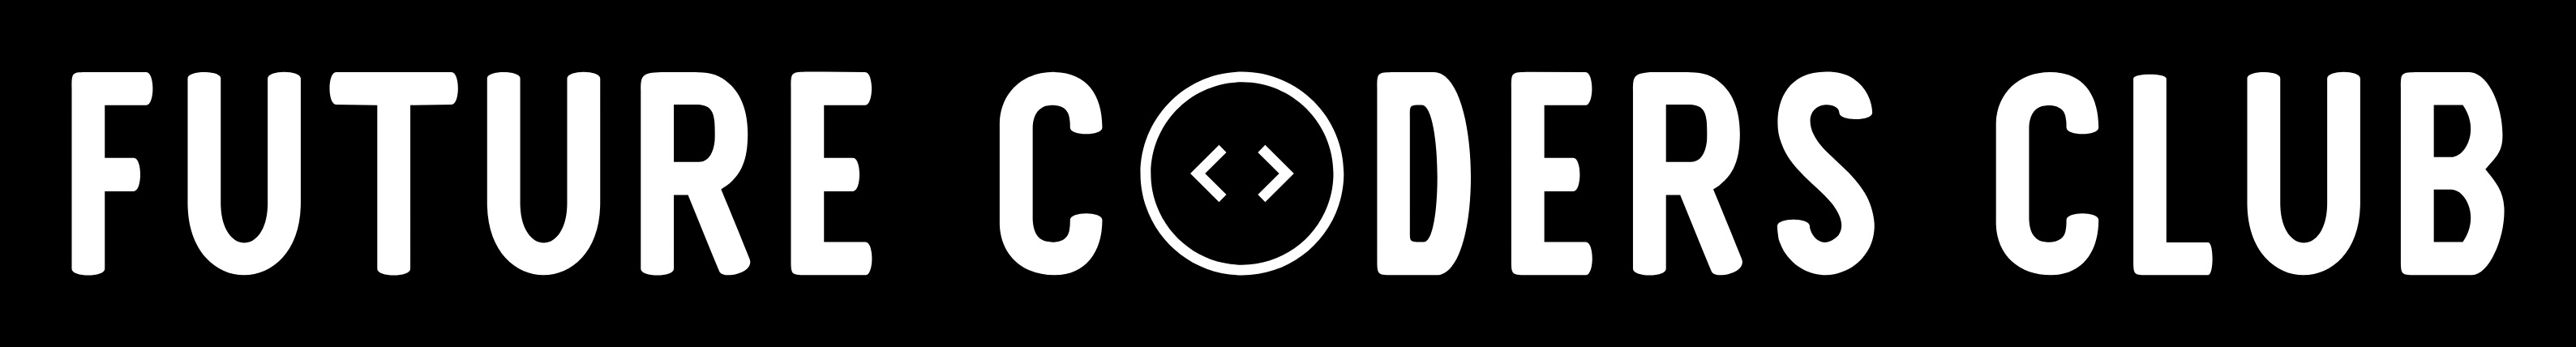

## Section 5: Data Visualisations with Python and Tableau
Goals:
- Cover pizza plots and other basic charts in Python
- Cover the fundamentals of Tableau, including all the typical charts

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import PyPizza, FontManager
import numpy as np
from scipy.stats import zscore

In [4]:
#example_data = {
   # 'Player': ['Player A', 'Player B', 'Player C', 'Player D'],
    #'Season': ['2023/24', '2023/24', '2023/24', '2023/24'],
   # 'Team within selected timeframe': ['Team X', 'Team Y', 'Team X', 'Team Z'],
   # 'Position': ['CB', 'FB', 'CM', 'WIDE'],
  #  "Defensive duels won, %": [70, 65, 50, 40],
  #  "Aerial duels won, %": [75, 60, 40, 35],
  #  "PAdj Interceptions": [80, 70, 60, 50],
  #  "Progressive runs per 90": [20, 30, 40, 50],
   # "Successful dribbles per 90": [30, 40, 50, 70],
  #  'Progressive passes per 90': [60, 70, 80, 50],
   # 'Passes to final third per 90': [50, 60, 70, 40],
  #  'Accurate progressive passes, %': [80, 78, 70, 60],
  #  'Accurate passes to final third, %': [70, 72, 65, 55],
  #  'Accurate long passes, %': [60, 50, 40, 30],
  #  'Dangerous attacking actions per 90': [40, 50, 70, 90],
  #  'Successful defensive actions per 90': [50, 60, 70, 80],
  #  'Through passes per 90': [40, 30, 20, 10],
 #   'xA per 90': [10, 20, 30, 40],
  #  'xG per 90': [20, 30, 40, 50],
  #  'xA/shot assist': [30, 40, 50, 60],
   # 'xG/shot': [40, 50, 60, 70],
  #  'xG performance': [50, 60, 70, 80],
   # 'Passes to penalty area per 90': [30, 40, 50, 60],
  #  'Deep completions per 90': [20, 30, 40, 50],
 #   'Accurate short / medium passes, %': [85, 80, 75, 70] 
#}

In [5]:
df = pd.read_csv("premplayers2324.csv")
# MOVE YOUR CSV INTO THE FOLDER, AND MAKE SURE THE FILE NAME IS CHANGED

In [6]:
def z_score_manipulation(df):
    df_zscores = df.copy()
    df_zscores[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').apply(zscore)
    return df_zscores

def sigmoid_manipulation(df):
    def sigmoid(x):
        return 100 / (1 + np.exp(-x))
    
    df_sigmoid = df.copy()
    df_sigmoid[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').apply(sigmoid)
    return df_sigmoid

In [7]:
df = sigmoid_manipulation(z_score_manipulation(df))

In [8]:
print(df)

                 Player Team within selected timeframe         Position  \
0             W. Saliba                        Arsenal              RCB   
1    Gabriel Martinelli                        Arsenal          LWF, LW   
2           L. Trossard                        Arsenal      LWF, CF, LW   
3              Jorginho                        Arsenal  DMF, LCMF, RCMF   
4             T. Partey                        Arsenal    DMF, RB, RCMF   
..                  ...                            ...              ...   
385            S. Bueno        Wolverhampton Wanderers          RCB, CB   
386           M. Kilman        Wolverhampton Wanderers     RCB, CB, LCB   
387          Pedro Neto        Wolverhampton Wanderers       RW, CF, LW   
388       Matheus Cunha        Wolverhampton Wanderers     CF, AMF, LWF   
389            T. Doyle        Wolverhampton Wanderers  LCMF, RCMF, DMF   

           Age Contract expires  Minutes played  Passport country   Foot  \
0    27.720567       20

In [ ]:
df.loc[0]

In [11]:
def get_purp_shade(value):
    min_purp = np.array([200, 180, 255])
    max_purp = np.array([75, 0, 110])
    color = min_purp + (max_purp - min_purp) * (value / 100)
    return f"#{int(color[0]):02X}{int(color[1]):02X}{int(color[2]):02X}"

In [14]:
def plot_player(df, player_name, position, team):
    player_data = df[(df['Player'] == player_name) & (df['Team within selected timeframe'] == team)]

    if player_data.empty:
        print("N/A: Player or season does not exist.")
        return None

    # Position-specific columns - CHANGE THESE TO YOUR STATS!
    position_columns = {
        'RCB': ["Defensive duels won, %", "Aerial duels won, %", "PAdj Interceptions", "Progressive runs per 90", 'Progressive passes per 90', 'Passes to final third per 90', 'Accurate progressive passes, %', 'Accurate passes to final third, %', 'Accurate long passes, %'],
    }

    # Select columns based on position
    selected_columns = position_columns.get(position)

    # Get values for selected columns and flatten into 2d
    values = player_data[selected_columns].values.flatten()

    # Format values into integers - to remove decimals as it makes plot look worse
    formatted_values = [int(round(v)) for v in values]

    # Error handling if x required metrics != x values
    if len(selected_columns) != len(formatted_values):
        print(f"Error: Length of params ({len(selected_columns)}) and values ({len(formatted_values)}) do not match for player {player_name} in season {season}.")
        return None

    params = selected_columns

    # Set slice colors based on value intensity (using get_black_shade)
    slice_colors = [get_purp_shade(v) for v in formatted_values]

    # Create figure + assign figure background color
    fig, ax = plt.subplots(figsize=(8, 8.5), subplot_kw=dict(polar=True))
    fig.patch.set_facecolor("#0E1118")

    # Radar chart (graph) background color to white
    ax.set_facecolor("#FFFFFF")

    # Standard formatting to create radar/pizza copied from mpl soccer
    baker = PyPizza(
        params=params,
        background_color="#FFFFFF",  # Set the radar chart background to white
        straight_line_color="#000000",  # Light gray grid lines
        straight_line_lw=1,
        last_circle_lw=0,
        other_circle_lw=0,
        inner_circle_size=0
    )

    baker.make_pizza(
        formatted_values,
        ax=ax,
        color_blank_space="same",
        slice_colors=slice_colors,
        value_colors=["#FFFFFF"] * len(selected_columns),
        value_bck_colors=["#000000"] * len(selected_columns),
        blank_alpha=0.4,
        kwargs_slices=dict(edgecolor="#000000", zorder=2, linewidth=1),
        kwargs_params=dict(color="#FFFFFF", fontsize=8),
        kwargs_values=dict(color="#000000", fontsize=10, zorder=3,
                           bbox=dict(edgecolor="#FFFFFF", facecolor="#000000", boxstyle="round,pad=0.2", lw=1))
    )

    caption = (player_name + ', ' + team + ', ' + position) 
    # Captions for player name and season
    fig.text(0.516, 0.918, caption, size=12, ha="center",
             fontproperties=FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Regular.ttf').prop, color="#FC554E")
    fig.text(0.516, 0.955, 'FUTURE CODERS CLUB', size=32, ha="center",
             fontproperties=FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab[wght].ttf').prop, color="#fc554e")
    fig.text(0.516, 0.0555, 'Want to learn to create visuals like this? Visit futurecodersclub.com', size=10, ha="center",
             fontproperties=FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Regular.ttf').prop, color="#FFFFFF")

    return fig

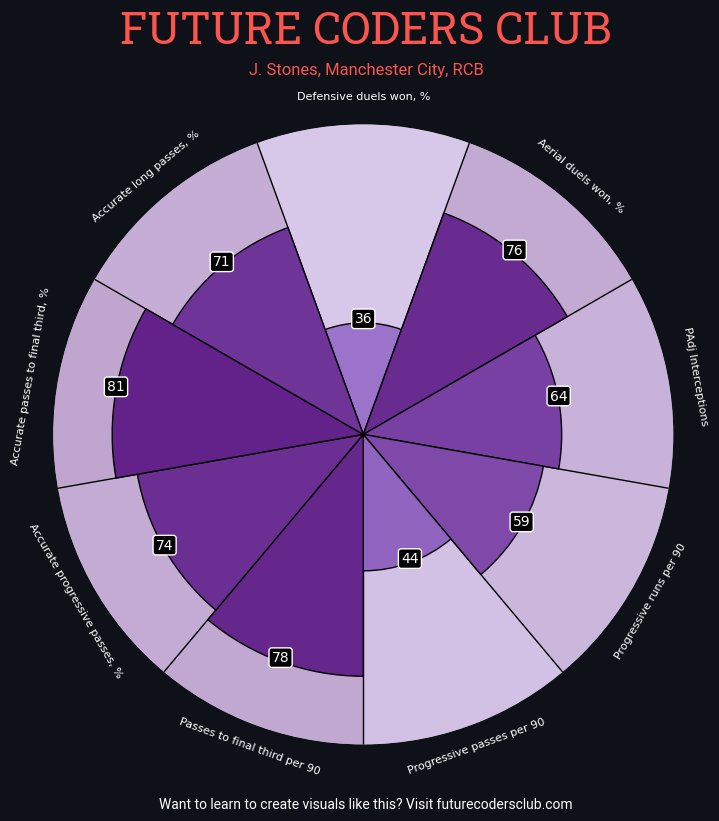

In [13]:
fig = plot_player(df, player_name='J. Stones', position='RCB', team='Manchester City')
plt.show()